In [1]:
import chollaread
import numpy as np
import yt
import trident
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-01-26 21:05:19,893 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-01-26 21:05:19,893 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-01-26 21:05:19,894 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-01-26 21:05:19,894 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-01-26 21:05:19,894 Parameters: cosmological_simulation   = 0.0


In [3]:
def DIY_plots_yz(x):
    
    p = np.array(ds.all_data()[('gas', 'density')])
    a = p.reshape(512, 256, 256)

    get_cmap("cet_bmw")

    fig = plt.figure(figsize=(10,8))
    p1 = fig.add_subplot(1,1,1)
    p1.set_facecolor('black')
    ax_y = np.arange(257)*(20/512)-5
    ax_z = np.arange(257)*(20/512)-5

    plt.pcolormesh(ax_y, ax_z, a[x,:,:].T, cmap = "cet_bmw", norm=colors.LogNorm())

    cb = plt.colorbar(pad=0.02) 
    cb.set_label(label='Density (g/cm$^3$)', size=15)
    cb.ax.tick_params(labelsize='large')
    plt.clim(vmin=10**-28, vmax=10**-25)

    plt.title('All Gas (Matplotlib)', fontsize = 20)
    plt.xlabel('y (kpc)', fontsize = 15)
    plt.ylabel('z (kpc)', fontsize = 15)
    plt.show()

In [4]:
def DIY_plots_xz(y):
    
    p = np.array(ds.all_data()[('gas', 'density')])
    a = p.reshape(512, 256, 256)

    get_cmap("cet_bmw")

    fig = plt.figure(figsize=(10,6))
    p1 = fig.add_subplot(1,1,1)
    p1.set_facecolor('black')
    ax_x = np.arange(513)*(20/512)-10
    ax_z = np.arange(257)*(20/512)-5

    plt.pcolormesh(ax_x, ax_z, a[:,y,:].T, cmap = "cet_bmw", norm=colors.LogNorm())

    cb = plt.colorbar(pad=0.02) 
    cb.set_label(label='Density (g/cm$^3$)', size=15)
    cb.ax.tick_params(labelsize='large')
    plt.clim(vmin=10**-28, vmax=10**-25)

    plt.title('All Gas (Matplotlib)', fontsize = 20)
    plt.xlabel('x (kpc)', fontsize = 15)
    plt.ylabel('z (kpc)', fontsize = 15)
    plt.show()

In [5]:
def slicep():
    get_cmap("cet_bmw")

    sl = yt.SlicePlot(ds, 'x', [("gas", "density")])
    sl.set_cmap(("density"), "cet_bmw")

    sl.set_zlim([("gas", "density")], 10**-28, 10**-25)

    sl.show()

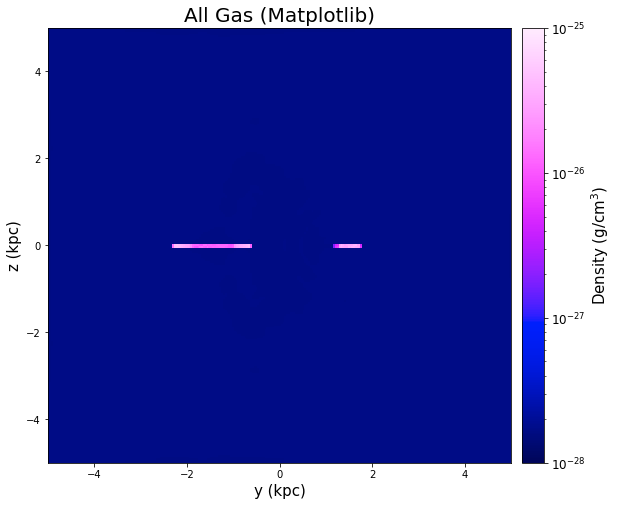

In [6]:
DIY_plots_yz(256)

yt : [INFO     ] 2022-01-20 14:56:27,731 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-20 14:56:27,731 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-20 14:56:27,732 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-20 14:56:27,733 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-20 14:56:27,737 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3


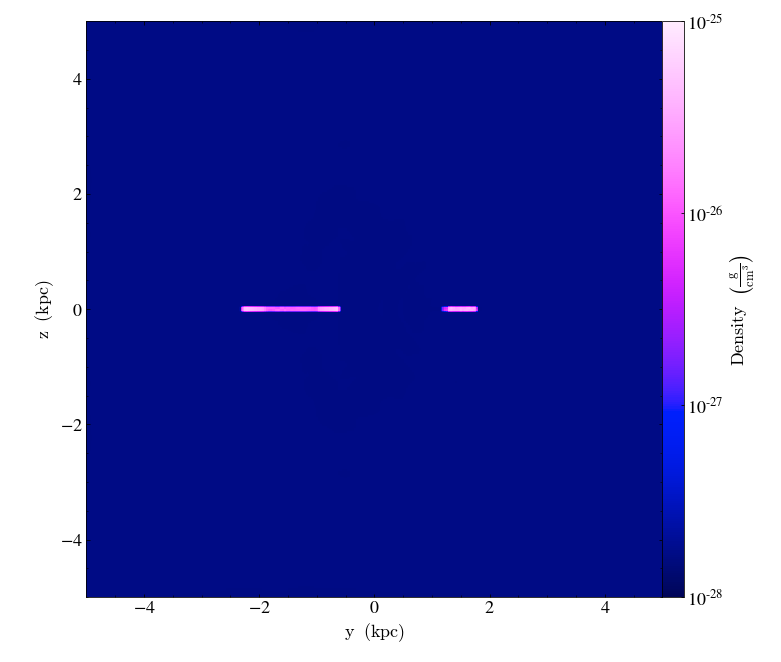

In [42]:
slicep()

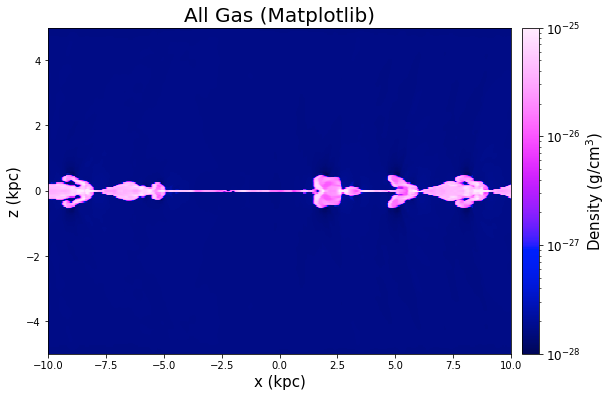

In [51]:
DIY_plots_xz(90)